<a href="https://colab.research.google.com/github/suryakiransuresh/ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
x = df.iloc[:, 3:13]
y = df.iloc[:, 13]

Create Dummy Variables

In [4]:
geography = pd.get_dummies(x["Geography"], drop_first = True)
gender = pd.get_dummies(x["Gender"], drop_first = True)

In [5]:
x = pd.concat([x, geography, gender], axis = 1)  ## Concatenate the dataframes

In [6]:
x = x.drop(["Geography", "Gender"], axis = 1)  ## remove redundant columns

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

ANN \
Importing Required Libraries and Packages

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [10]:
classifier = Sequential()  ##Initialising the ANN

In [11]:
#Adding the input and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

In [13]:
#Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

In [14]:
#Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [15]:
#Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
#Fitting the ANN to the Training dataset
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7980 - loss: 0.5527 - val_accuracy: 0.7959 - val_loss: 0.4908
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7948 - loss: 0.4830 - val_accuracy: 0.8050 - val_loss: 0.4607
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8092 - loss: 0.4461 - val_accuracy: 0.8054 - val_loss: 0.4457
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8198 - loss: 0.4292 - val_accuracy: 0.8118 - val_loss: 0.4360
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8211 - loss: 0.4323 - val_accuracy: 0.8137 - val_loss: 0.4299
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8219 - loss: 0.4019 - val_accuracy: 0.8175 - val_loss: 0.4214
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8105 - loss: 0.4218 - val_accuracy: 0.8254 - val_loss: 0.4084
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8460 - loss: 0.3807 - val_accu

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


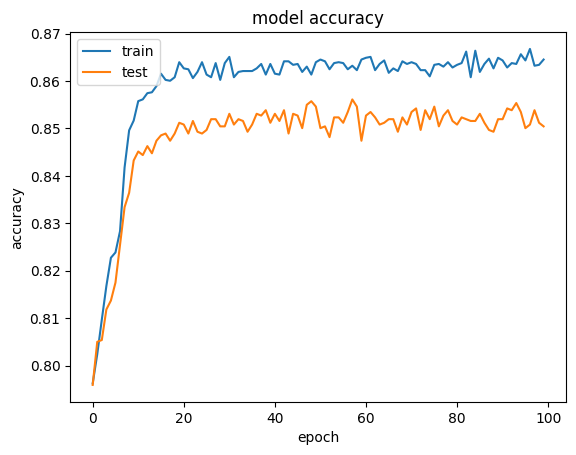

In [18]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

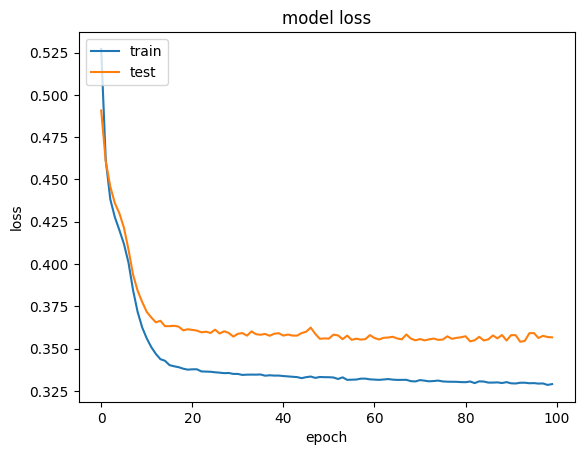

In [19]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Predicting and Model Evaluation

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1524,   71],
       [ 211,  194]])

In [23]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.859